11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8489 - loss: 0.5332 - val_accuracy: 0.9647 - val_loss: 0.1243
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9611 - loss: 0.1308 - val_accuracy: 0.9705 - val_loss: 0.0950
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9737 - loss: 0.0859 - val_accuracy: 0.9747 - val_loss: 0.0866
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9795 - loss: 0.0646 - val_accuracy: 0.9793 - val_loss: 0.0748
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9860 - loss: 0.0465 - val_accuracy: 0.9750 - val_loss: 0.0898
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9879 - loss: 0.0370 - val_accuracy: 0.9793 - val_loss: 0.0817
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9906 - loss: 0.0298 - val_accuracy: 0.9788 - val_loss: 0.0840
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9928 - loss: 0.0236 - val_accuracy: 0.

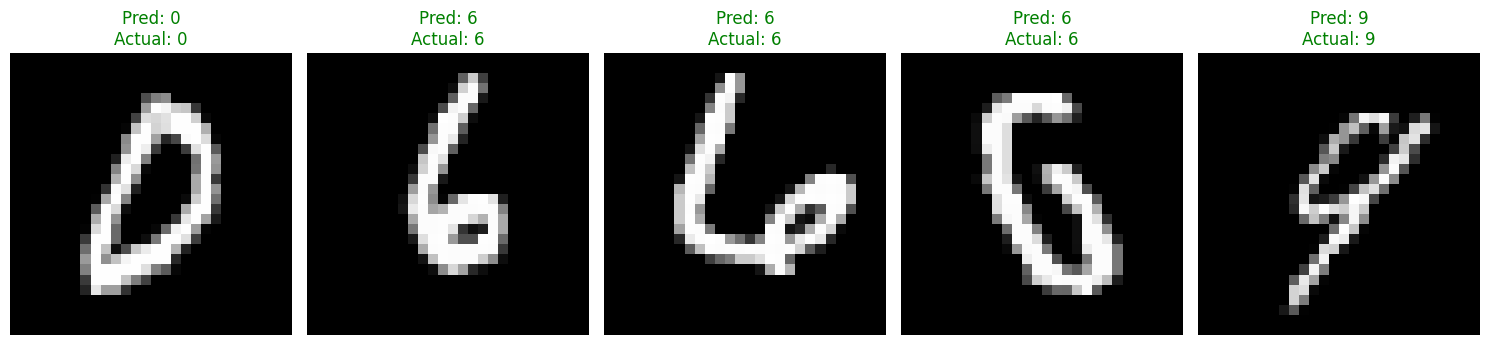

In [ ]:
# Step 1: Load required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Step 2: Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Step 3: Data preprocessing
# Normalize pixel values to [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Step 4: Model selection and training
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer
    Dense(128, activation='relu'),  # Hidden layer 1
    Dense(64, activation='relu'),   # Hidden layer 2
    Dense(10, activation='softmax') # Output layer
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.1)

# Step 5: Model testing
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc:.4f}')

# Step 6: Make 5 predictions
sample_indices = np.random.choice(len(test_images), 5)
predictions = model.predict(test_images[sample_indices])

plt.figure(figsize=(15, 5))
for i, idx in enumerate(sample_indices):
    # Display image
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[idx], cmap='gray')
    plt.axis('off')

    # Get predicted and actual labels
    pred_label = np.argmax(predictions[i])
    actual_label = np.argmax(test_labels[idx])

    plt.title(f'Pred: {pred_label}\nActual: {actual_label}',
              color='green' if pred_label == actual_label else 'red')

plt.tight_layout()
plt.show()